# Run CalicoST on a simulated data

## Download the data

We applied CalicoST on a small simulated data provided by [examples/simulated_example.tar.gz](https://github.com/raphael-group/CalicoST/blob/main/examples/simulated_example.tar.gz) from the github, which contains the following files/directories:
- simulated_example
    - outs: simulated transcript count matrix and spatial coordinates
    - snpinfo: parsed allele count matrix

Download and untar the data by
```
wget https://github.com/raphael-group/CalicoST/blob/main/examples/simulated_example.tar.gz
tar -xzvf simulated_example.tar.gz
```

## Run CalicoST to infer CNAs and cancer clones assuming spots are purely tumor or purely normal

To run CalicoST, we first copy `configuration_cna` file provided by CalicoST github to the example directory.
```
cd simulated_example
cp <CalicoST git-cloned directory>/configuration_cna ./
```

Then we modify the following paths in the copied `configuration_cna` file:
- `spaceranger_dir` is path to the `outs` directory of the downloaded data.
- `snp_dir` is the path to the `snp_info` directory of the downloaded data.
- `output_dir` is the output directory for CalicoST to write the inferred clones and CNAs. It must be an existing directory.


We keep the default values for other parameters in `configuration_cna` file, while refer to this [parameter specification](https://calicost.readthedocs.io/en/latest/parameters.html) for more details if parameter tuning is needed for other samples.

Now we use CalicoST to infer clones and allele-specific CNAs by running the following command in terminal
```
OMP_NUM_THREADS=1 python <CalicoST git-cloned directory>/src/calicost/calicost_main.py -c configuration_cna
```

It takes about 2h to run on this simulated data. When finished, the CalicoST output directory <output_dir> will contain the following files:
- `<output_dir>/clone3_rectangle0_w1.0/clone_labels.tsv` store the inferred cancer clones;
- `<output_dir>/clone3_rectangle0_w1.0/cnv_seglevel.tsv` store the inferred allele-specific copy number profile per genomic segment;
- `<output_dir>/clone3_rectangle0_w1.0/cnv_genelevel.tsv` store the inferred allele-specific copy numbers projected to expressed genes;
- `<output_dir>/clone3_rectangle0_w1.0/cnv_diploid*`, `calicost/<random initialization>/cnv_triploid*`, `calicost/<random initialization>/cnv_tetraploid*` store an additional version of integer allele-specific copy numbers when enforcing the ploidy to be diploid, triploid, and tetraploid. Experienced users can decide which ploidy to use based on prior knowledge or based on the rdr-baf plots.
- `<output_dir>/clone3_rectangle0_w1.0/plots/` store the plots corresponding to the spatial organization of inferred cancer clones and allele-specific copy numbers along the genome for each clone.

## Load the results corresponding to the best initialization

Remember we run CalicoST using five different random seeds specified by `random_state`, now we select the random seed corresponding to the highest log-likelihood under CalicoST's probabilistic model using the following function

In [1]:
import numpy as np
import pandas as pd

output_dir = "."
df_clones = pd.read_csv(f"{output_dir}/clone3_rectangle0_w1.0/clone_labels.tsv", header=0, index_col=0, sep='\t')
df_clones

,clone_label
BARCODES,
spot_0,2
spot_1,2
spot_2,2
spot_3,2
spot_4,2
...,...
spot_1795,1
spot_1796,1
spot_1797,1


In [2]:
df_cna = pd.read_csv(f"{output_dir}/clone3_rectangle0_w1.0/cnv_genelevel.tsv", header=0, index_col=0, sep='\t')
df_cna

,clone0 A,clone0 B,clone1 A,clone1 B,clone2 A,clone2 B
gene,,,,,,
ISG15,1,1,1,1,1,1
C1orf159,1,1,1,1,1,1
SDF4,1,1,1,1,1,1
UBE2J2,1,1,1,1,1,1
INTS11,1,1,1,1,1,1
...,...,...,...,...,...,...
CPT1B,1,1,1,1,1,1
CHKB,1,1,1,1,1,1
CHKB-DT,1,1,1,1,1,1


The plots generated by CalicoST are in PDF format and can be directly viewed. Below, we load the PDF plots in this notebook for easy visualization using an additional package 

Firstly, `<output_dir>/clone3_rectangle0_w1.0/plots/clone_spatial.pdf` shows the inferred cancer clone in space. 

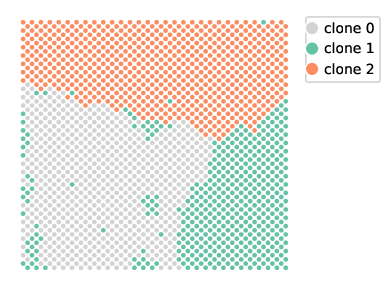

In [4]:
from wand.image import Image as WImage
img = WImage(filename=f"{output_dir}/clone3_rectangle0_w1.0/plots/clone_spatial.pdf", resolution=100)
img

Secondly, `<output_dir>/clone3_rectangle0_w1.0/plots/acn_genome.pdf` shows the allele-specific copy numbers per clone along the genome. The color scheme follows

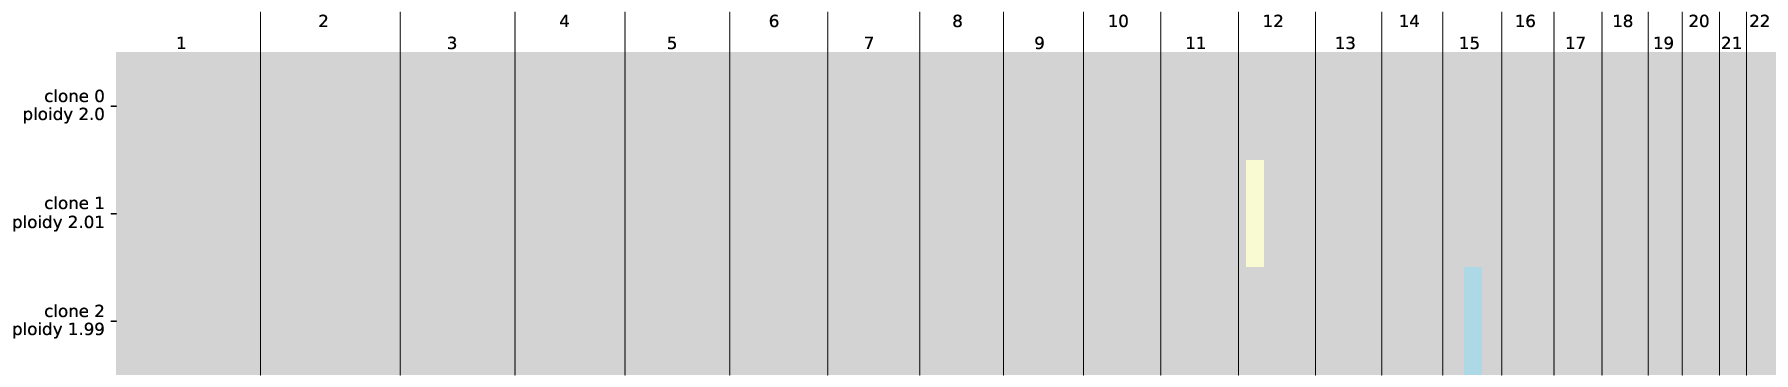

In [5]:
# allele-specific copy numbers of each clone (the color scheme is the same as Fig2c
img = WImage(filename=f"{output_dir}/clone3_rectangle0_w1.0/plots/acn_genome.pdf", resolution=120)
img

Thirdly, `<output_dir>/clone3_rectangle0_w1.0/plots/rdr_baf_defaultcolor.pdf` shows RDR-BAF along the genome for each clone. Here, each color indicates a HMM state, while different colors may correspond to the same allele-specific copy numbers.

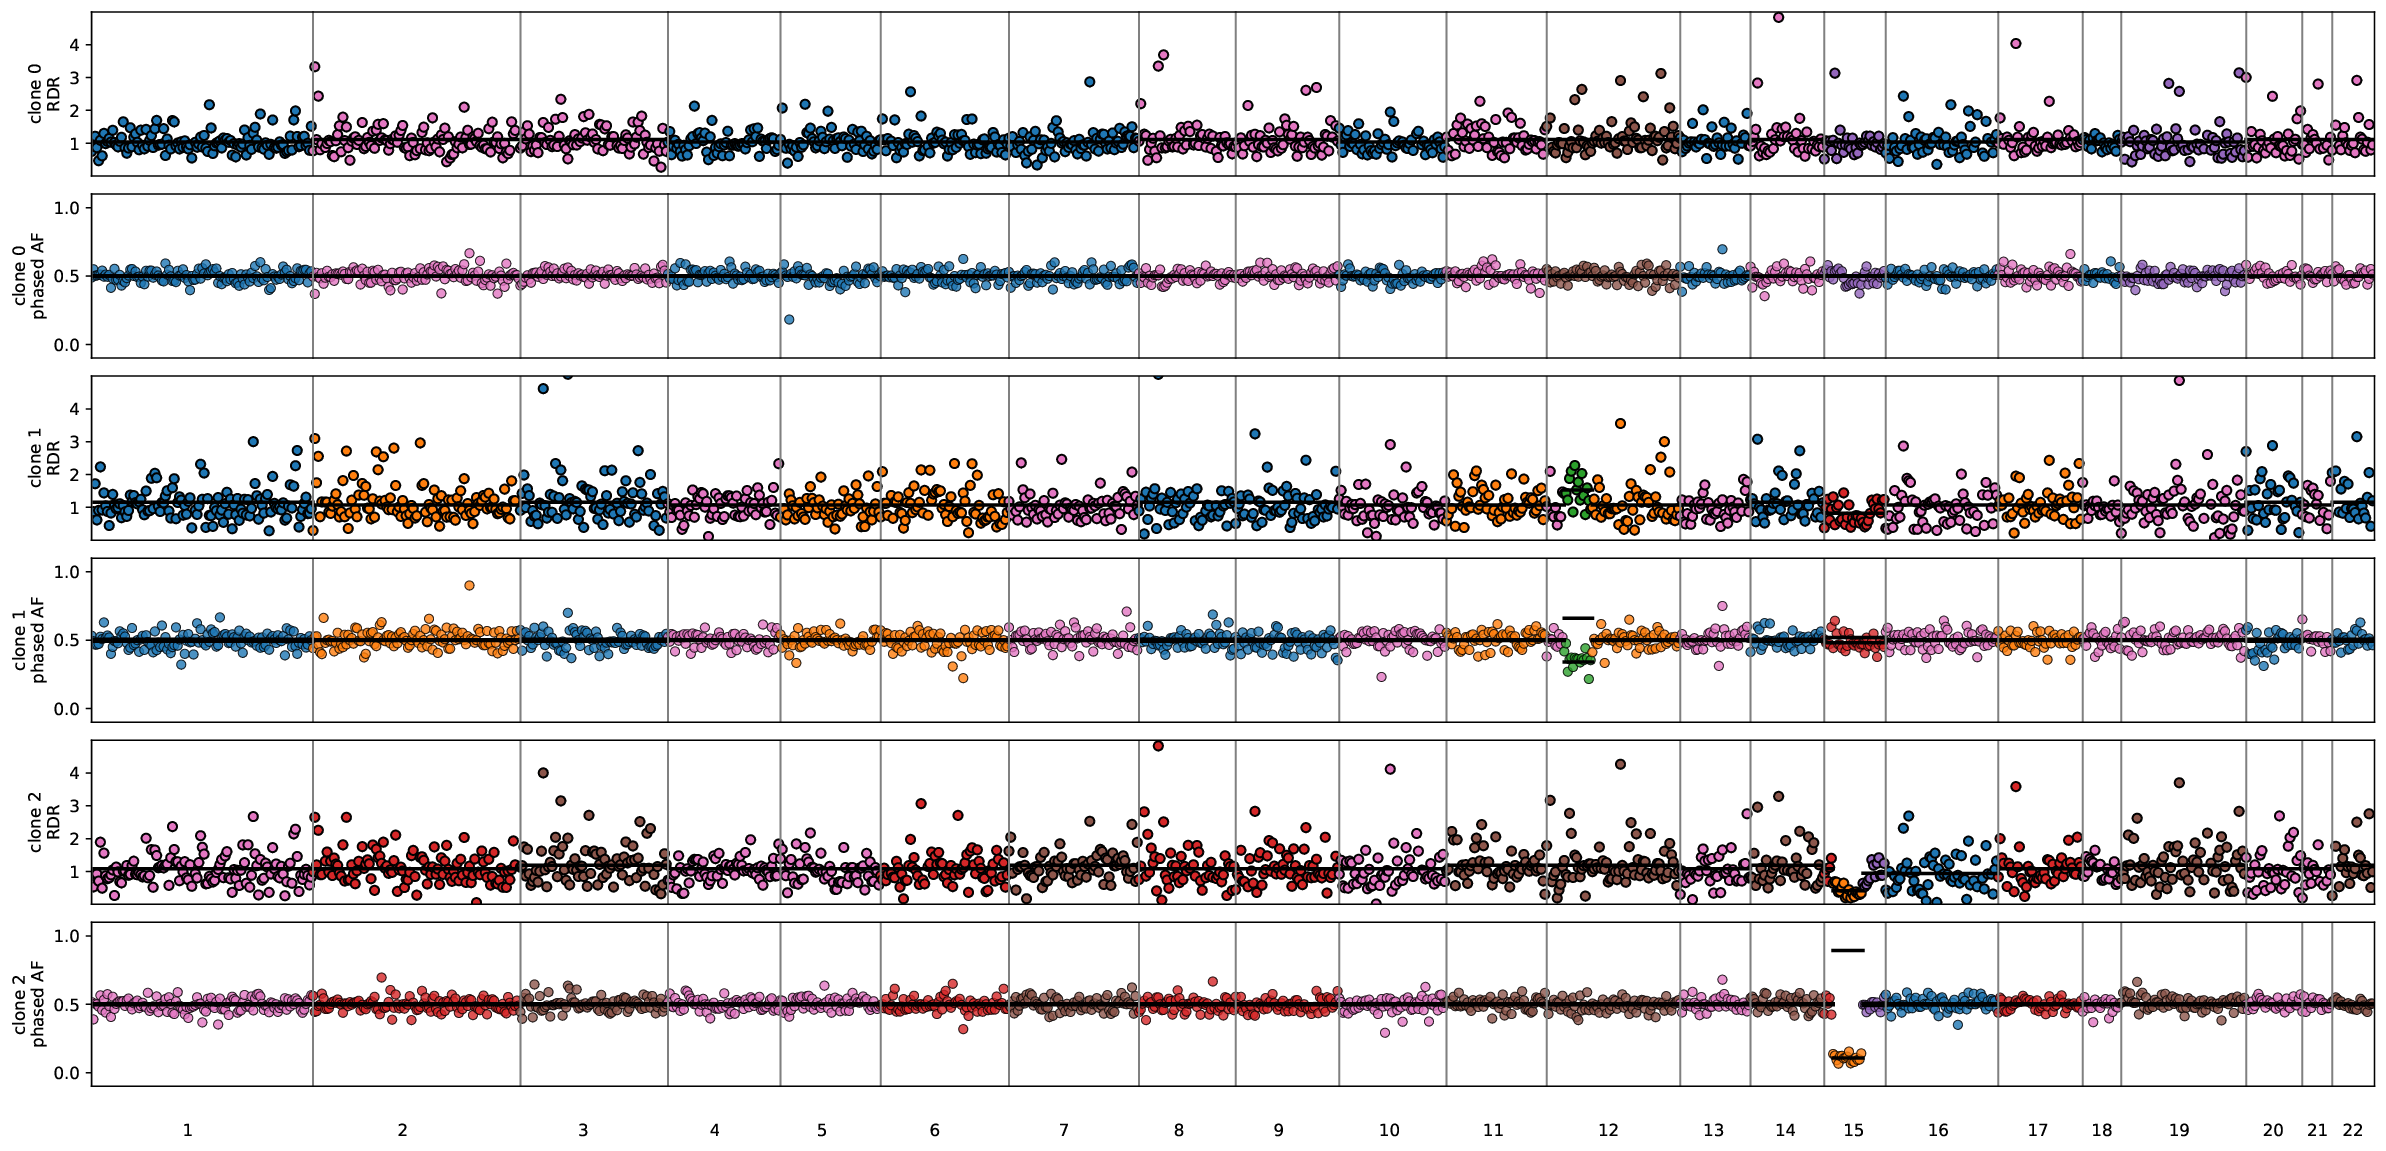

In [6]:
# RDR-BAF plot along the genome for each clone
img = WImage(filename=f"{output_dir}/clone3_rectangle0_w1.0/plots/rdr_baf_defaultcolor.pdf", resolution=120)
img
